# Introduction to Git


<div style="display:block;margin:auto;width:800px;">
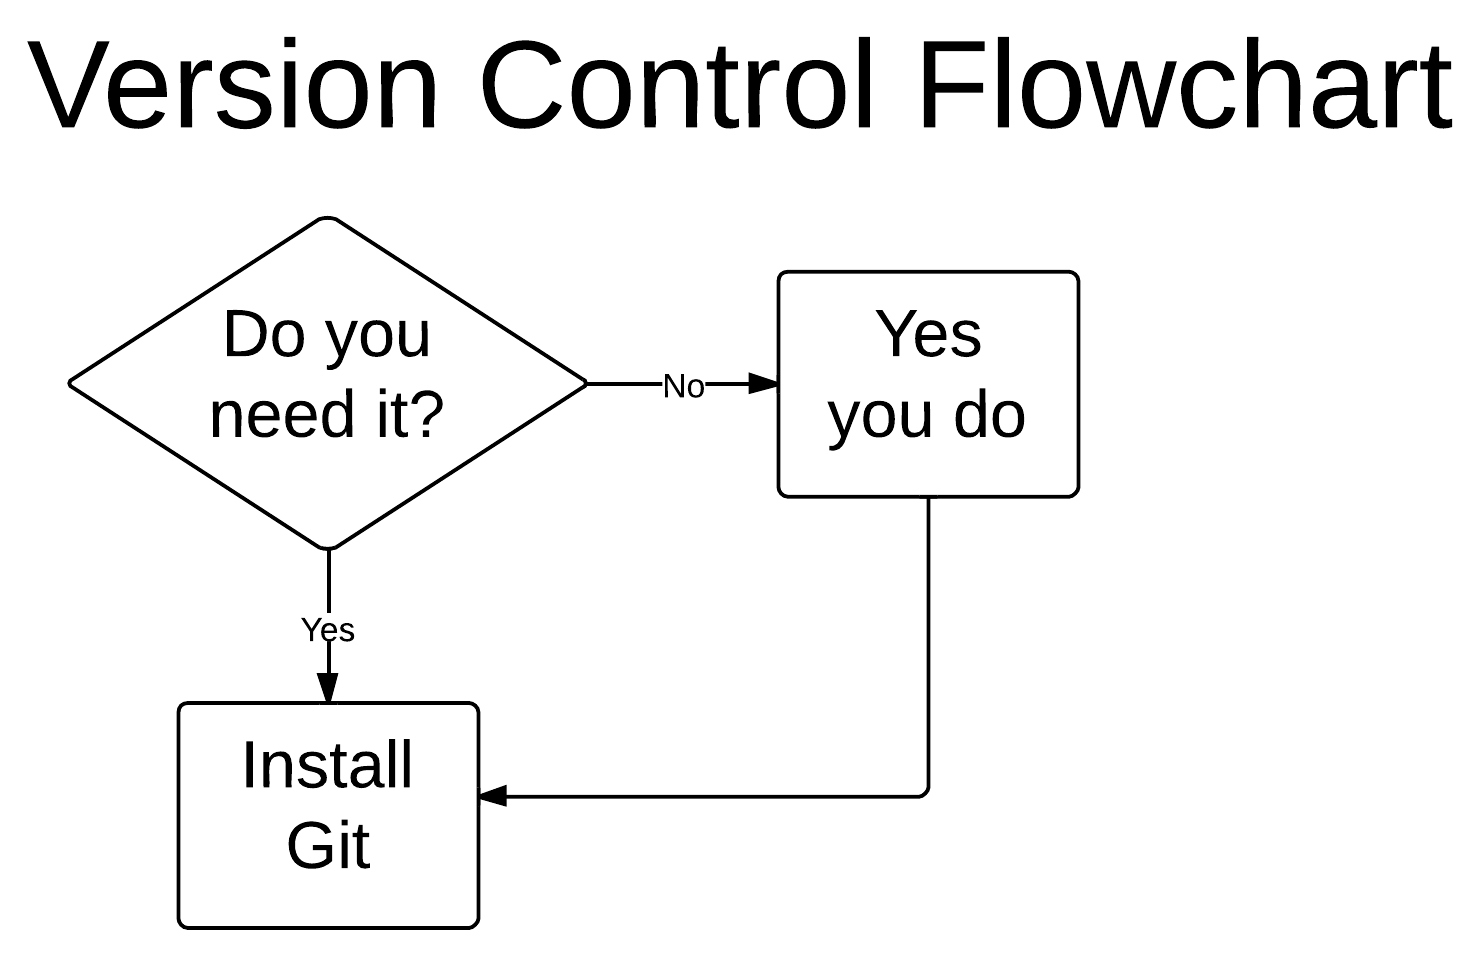
</div>

Version control is essential for collaborative work. We're going to step into Git and some common scenarios in the context of a project.

**From the [Git README](https://github.com/git/git/blob/e83c5163316f89bfbde7d9ab23ca2e25604af290/README):**

"git" can mean anything, depending on your mood.

 - random three-letter combination that is pronounceable, and not
   actually used by any common UNIX command.  The fact that it is a
   mispronounciation of "get" may or may not be relevant.
 - stupid. contemptible and despicable. simple. Take your pick from the
   dictionary of slang.
 - "global information tracker": you're in a good mood, and it actually
   works for you. Angels sing, and a light suddenly fills the room. 
 - "goddamn idiotic truckload of sh*t": when it breaks
 
 This is a stupid (but extremely fast) directory content manager.  It
doesn't do a whole lot, but what it _does_ do is track directory
contents efficiently.

As you might be able to infer, Linus Torvalds, the creator of Git (as well as the Linux kernel) is a little eccentric. He does, however, create indispensable software.

## Getting to Grips with Git
We're going to set up for a collaborative project where our goal is to extract a set of useful features from some Crypto trading data. You'll be collaborating with your classmates on this through Git and Github, but we'll step through the nuts and bolts of getting the project set up locally and dealing with some common patterns in Git.

First we'll set up a local folder which will act as our Git repository. For me, this process looks as follows:

```bash
cd ~/Github
mkdir crypto_collab
cd crypto_collab
```

The newly-created directory is empty, which is perfect. The next step is to initialize a Git repo in the folder. This is done simply in the following way:

```bash
git init
```

An empty Git repository has now been created in the `crypto_collab` directory. You should see a read out something along the lines of:
```bash
Initialized empty Git repository in /home/tim/Github/crypto_collab/.git/
```

This enables us to interact with the contents of the directory using tracking commands for the repository like `git status`, though the contents are pretty boring right now.

```bash
On branch master

Initial commit

nothing to commit (create/copy files and use "git add" to track)
```


It's looking a little sparse, so lets go ahead and add a mardown `README` file to the repository. On Linux, that looks like `touch README..md`, and using your editor of choice, something like:

```txt
# crypto_collab

A repository for feature extraction on cryptocurrency trading data. Mainly for illustrative purposes regarding collaboration using Git.
```

Fantastic! Now we have something to work with. `git status` should now reflect a new untracked file in the repository:
```bash
On branch master

Initial commit

Untracked files:
  (use "git add <file>..." to include in what will be committed)

        README.md

nothing added to commit but untracked files present (use "git add" to track)
```

We'll go through the basic pattern of adding and commiting the `README` file for the repository's initial commit. We'll keep our first commit directly on the master branch:

```bash
git add README.md
git commit -m 'initial commit'
```

You should see a read out something along the lines of:

```bash
[master (root-commit) 5c3cd3d] initial commit
 1 file changed, 4 insertions(+)
 create mode 100644 README.md
```

Your commit should also reflect with a unique associated hash value when you check `git log`.


Right. Now that we have some content locally, its time to set up an empty mirror repository under your Github account. You should choose one team member to set up a remote repository: this is the remote repository that each team member will be tracking. From your prework on Git, I'm going to assume that you're familiar with this quick process.

After adding remote repository, we need to point the local repository at the correct remote repository:

```bash
git remote add origin git@github.com:twolffpiggott/crypto_collab.git
```

The `remote add` command follows the following general pattern:

```bash
git remote add <name> <url>
```
`<name>` is the name assigned to the remote repository located at `<url>`. `origin` is the deafult name assigned to the remote repository to which you want to publish your commits (though you can work on several remote repos simultaneously).

We can check that the remote repository is being tracked correctly with the `git remote -v` command. If your output from this is something along the following lines, you're good to go:

```bash
origin  git@github.com:twolffpiggott/crypto_collab.git (fetch)
origin  git@github.com:twolffpiggott/crypto_collab.git (push)
```

Our remote repository is now being tracked correctly, so we can go ahead and `push` our commits to the remote master branch:
```bash
git push -u origin master
```

Check out out the remote Github; you should see your content and commit reflect there!

## Git Workflow Conventions

### Branching
Now it makes sense to spend a bit of time on best practice conventions for collaborating using Git. Of course, there are elements of subjectivity here and ultimately you'll settle on the practices that are most functional and sustainable for your working needs. Nonetheless, a few pointers can help set you up on a good path. 

When developing on a project, you'll likely be working on many different component parts. In our examples so far, we've only ever worked on or pushed to the `master` branch. But in practice, many teams adopt the convention that code on the `master` branch should only be final-stage, production-ready content. Any component part in development should be separated onto its another branch.

Depending on the level of specificity of the component parts, it may make sense for them to each be assigned a unique branch, or for them to be collected into a smaller number of branches, logically grouped. 

Any content in development should follow the pattern of branching off `master`, development, then incorporation back into master through a `pull request`.

### Commits
On a given development branch, there are likely a number of logically organised sub-tasks that make up the development process. Best practice for commits on a branch is to structure them according into these logically separated subtasks, and to ultimately have a limited set of commits per branch that make sense to anyone collaborating with you and reviewing your code. 

In practice, we all deviate from this ideal pattern, but it makes sense to keep in mind as an aspiration.
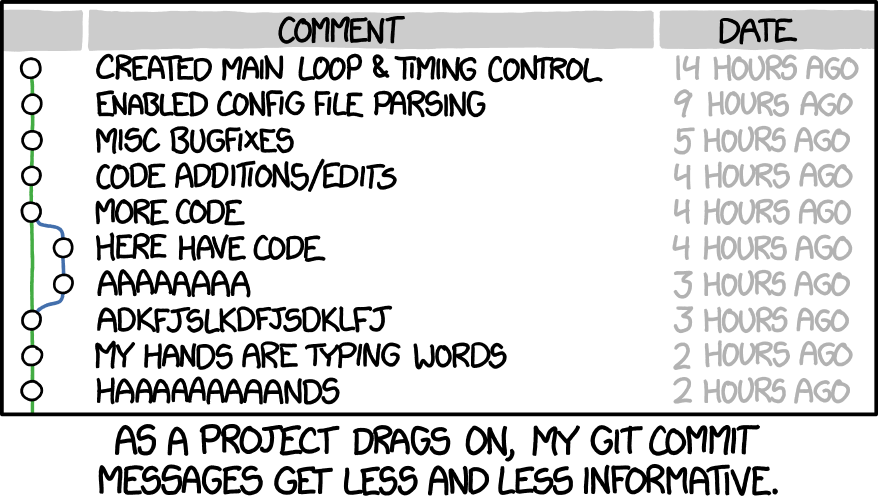

Lets go through the branching development process with the first task, of doing some basic preprocessing on the data before the feature extraction. I'm going to call this branch `preprocessing`. The best practice pattern is as follows. 

1. To start, make sure you're on the master branch: `git checkout master`.
2. Then make sure your local version of `master` is up to date with the remote version: `git pull`.
3. Next, create and checkout (i.e. move to and start working on) your development branch. Easy shorthand for this: `git checkout -b preprocessing`

You can verify that you are now on the correct development branch with the `git branch` command. Your current working branch is marked with an asterisk:

```bash
* preprocessing
  master
```
We'll add the following script to the repository:

In [ ]:
from datetime import datetime
import pandas as pd
import os


def convert_dates(date):
    """
    Converts time since the Unix epoch in milliseconds to a datetime object.
    """
    return datetime.fromtimestamp(date / 1000)


def read_trade_data(filepath):
    """
    Read csv containing crypto trade data at <filepath>, convert time fields
    and select relevant columns.

    :param filepath: path to csv file
    :returns: (exchange, symbol, preprocessed Pandas dataframe)
    """
    trades = pd.read_csv(filepath)
    # convert dates from unix timestamps
    trades['date'] = trades['date'].apply(convert_dates)
    trades.set_index('date', inplace=True)
    trades.sort_index(ascending=True, inplace=True)
    # check data relates to a single exchange and coin pair
    assert trades['exchange'].nunique() == 1, 'Multiple exchanges present'
    assert trades['symbol'].nunique() == 1, 'Multiple symbols present'
    # select relevant columns
    trade_features = trades[['price', 'amount', 'sell']]
    exchange = trades['exchange'].iloc[0]
    symbol = trades['symbol'].iloc[0]
    return exchange, symbol, trade_features


def write_processed(exchange, symbol, data, loc=None):
    """
    Write processed features for a given exchange and coin pair
    to a parquet file named '<exchange>_<symbol>_trades.parquet'.

    :param exchange: str exchange name
    :param symbol: str symbol name
    :param data: dataframe
    :param loc: alternative filepath in which to save
    """
    filename = f'{exchange}_{symbol}_trades.parquet'
    path = os.getcwd() if loc is None else loc
    filepath = os.path.join(path, filename)
    data.to_parquet(filepath)


if __name__ == "__main__":
    exchange, symbol, data = read_trade_data('Bitfinex_BTCEUR_trades_'
                                             '2018_02_02.csv')
    write_processed(exchange, symbol, data)

We'll go through the exact same ``add`` and ``commit`` pattern you've seen before for this file. Since we're working on a new local branch that we've created (``preprocessing``), however, it doesn't have an upstream (remote) counterpart, so we specify the remote branch explicitly:
```bash
git push -u origin preprocessing
```

Great! We can now see the new branch in our Github repo.
<div style="display:block;margin:auto;width:800px;">
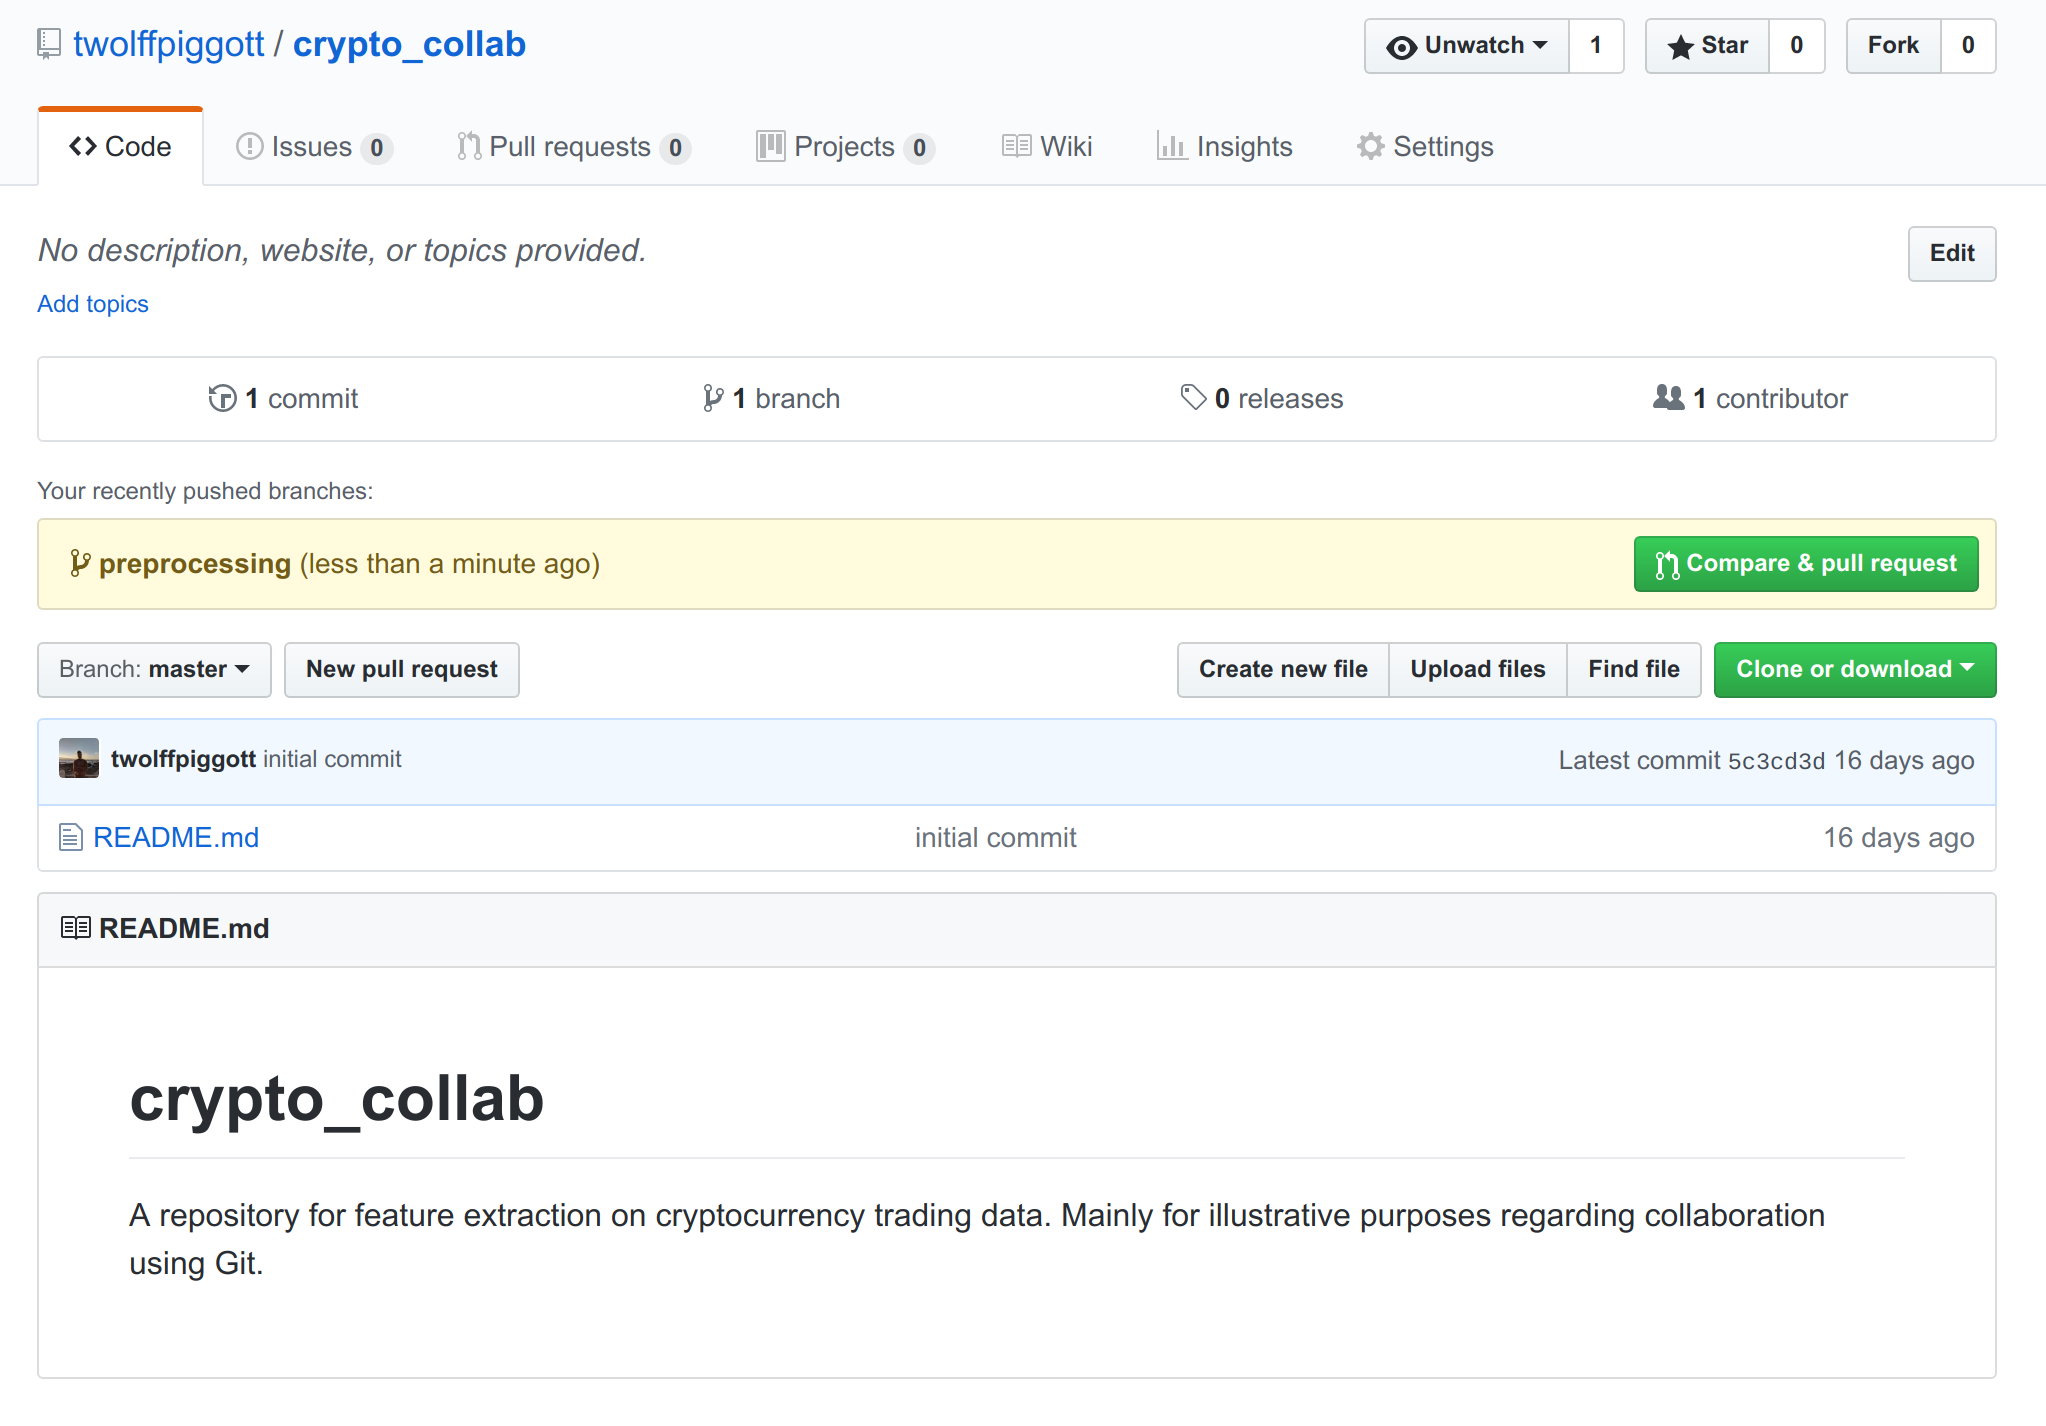
</div>

We'll open a pull request to incorporate the changes made on our branch into the master branch:
<div style="display:block;margin:auto;width:800px;">
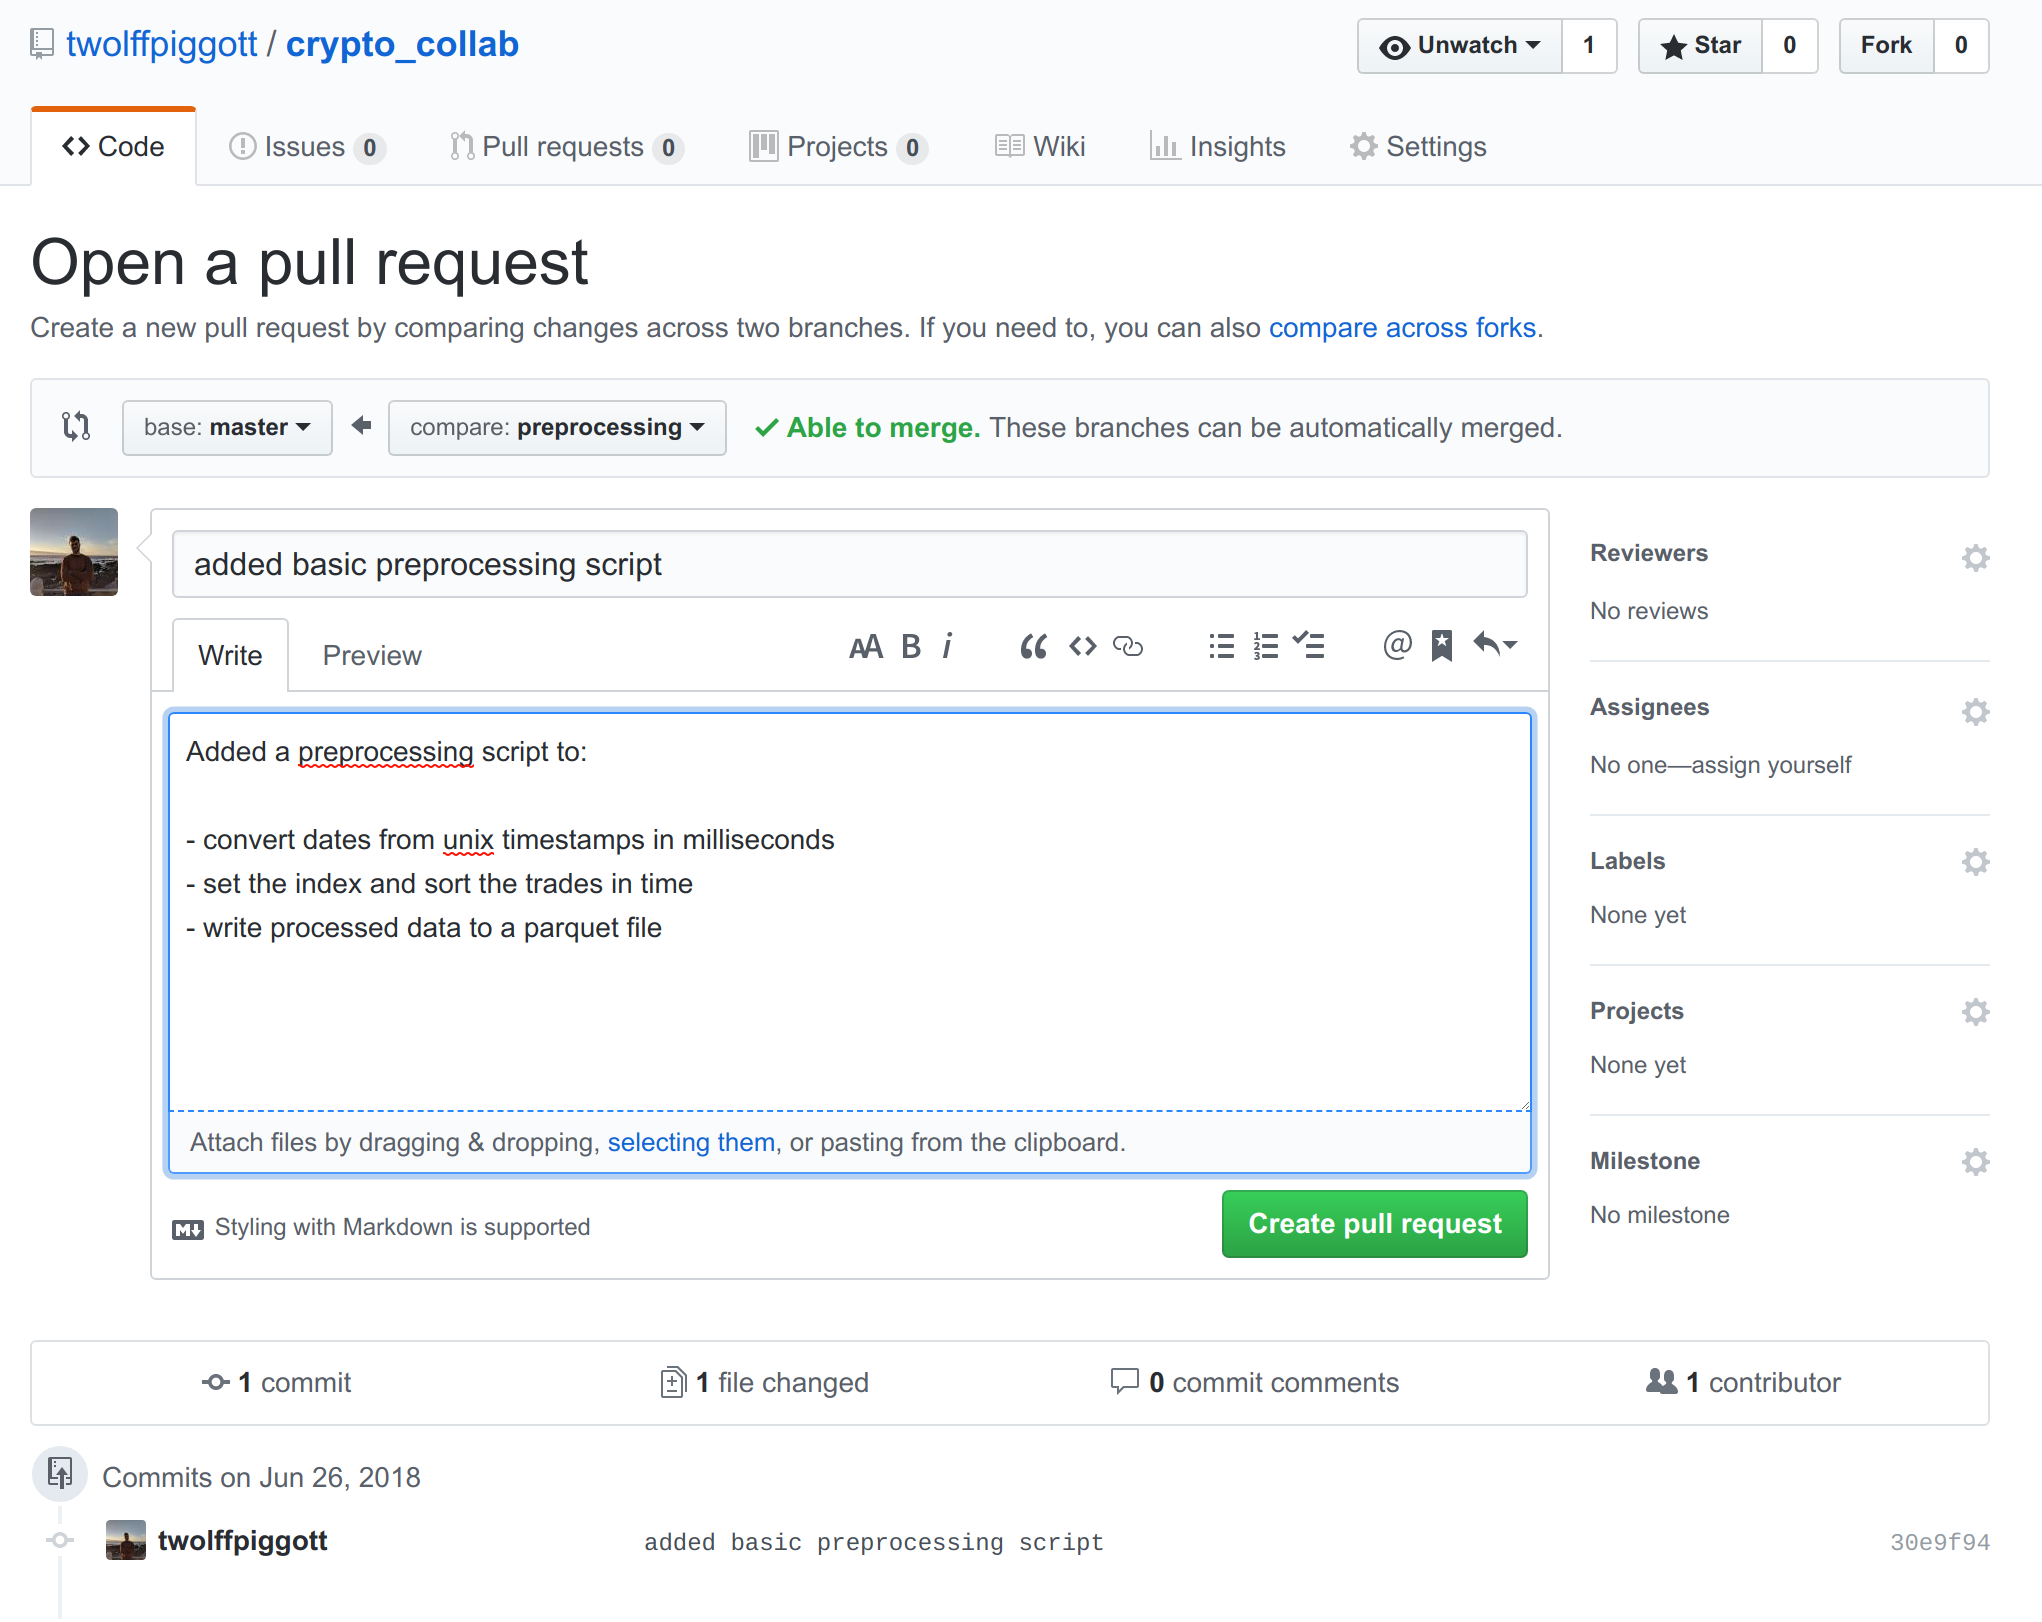
</div>

You'll immediately see the option to ``merge`` the pull request into the ``master`` branch. Since this is an illustrative exercise at the moment, we'll go ahead and do this. In the context of a working project, you'd have a team mate review and approve your pull request, *you wouldn't merge your own pull request*. 

You'll then see the option to delete the branch that was merged into ``master``. Go ahead and delete the branch. Remember, the convention we've adopted is:
1. Create a branch for a specific feature or improvement
2. Incorporate it into ``master``
3. Delete the local and remote branch, and create a new branch off the updated ``master`` for new features.

Great! Our updates now reflect on ``master``, and our old branch has been pruned. Lets look into some additional features. 

Issues on Github are a great way to keep track of development and plan additions. We'll create issues for new features that we can then ``branch`` and create new pull requests to address. We'll start with an issue to update our script to accept command line arguments:
<div style="display:block;margin:auto;width:800px;">
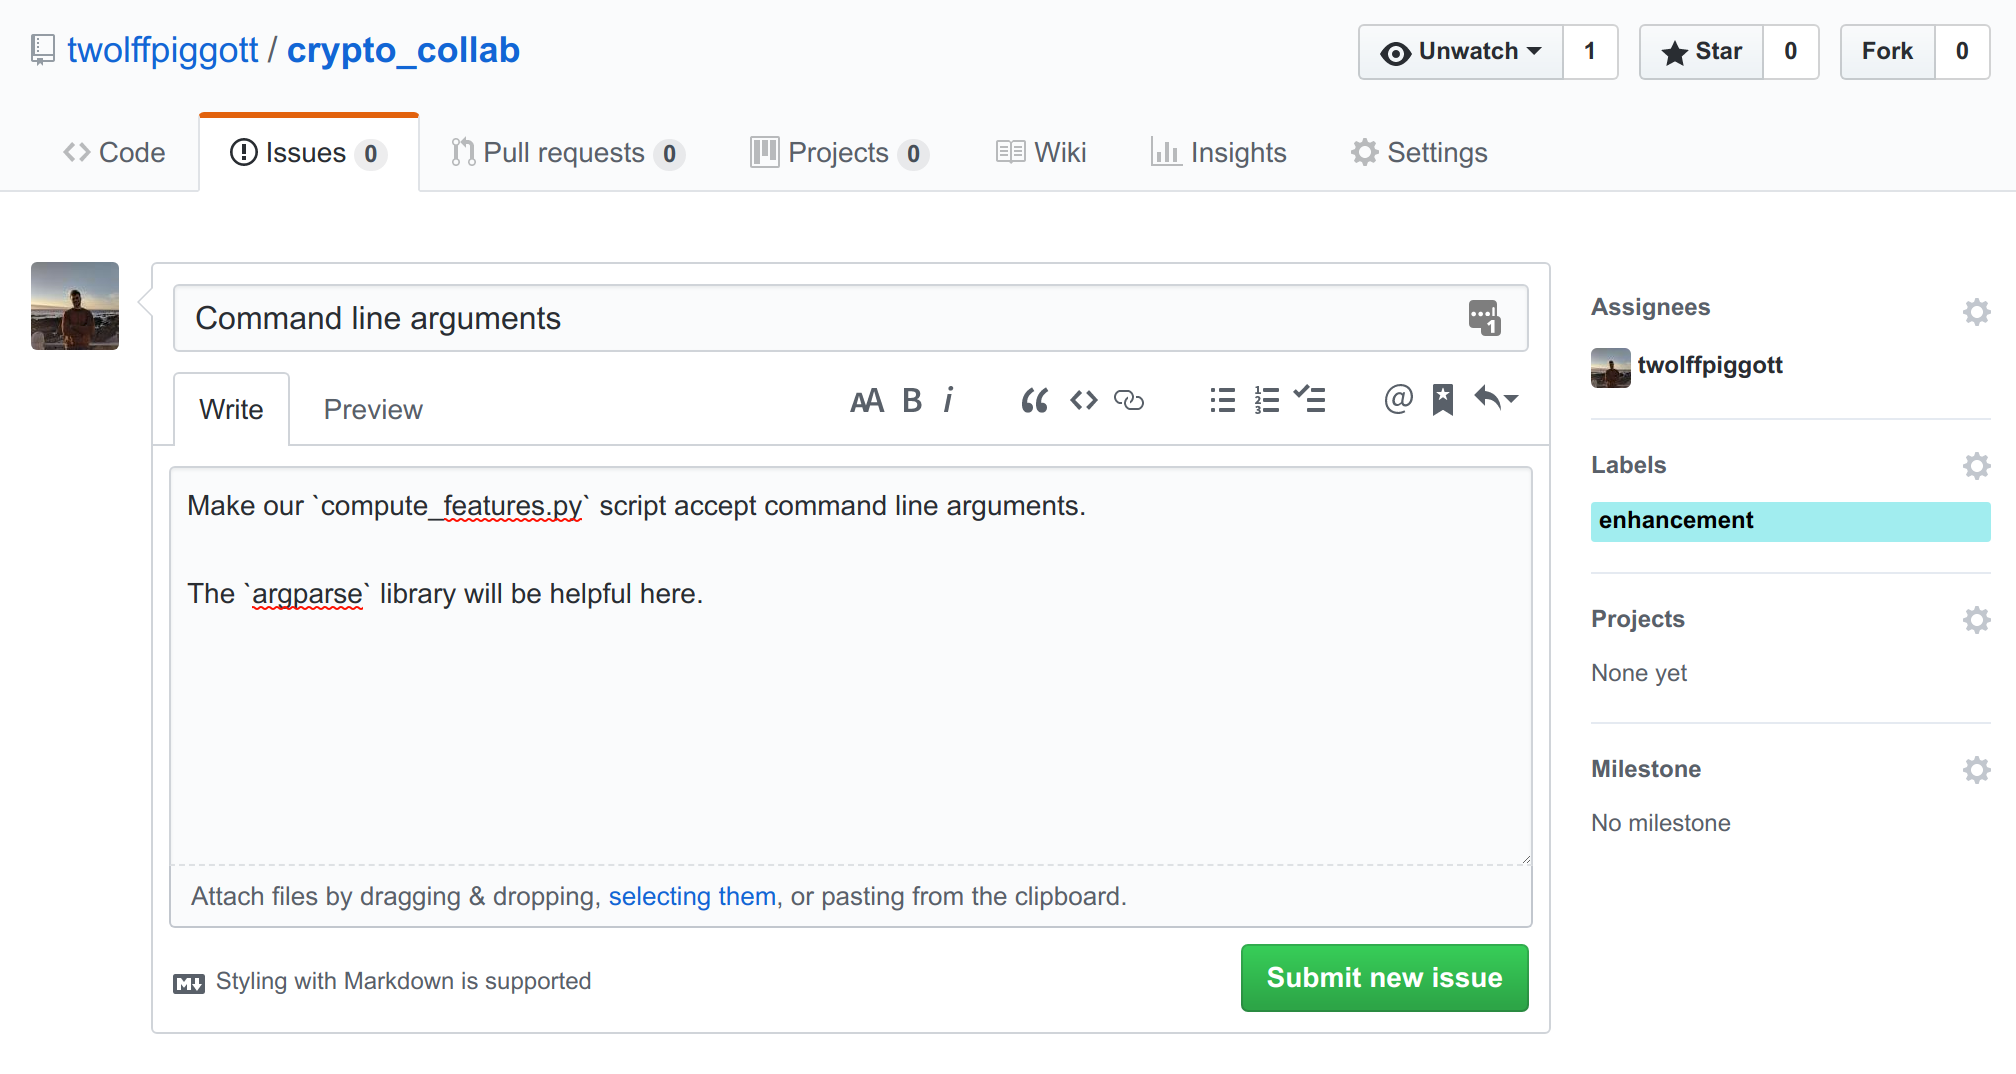
</div>

## General Git Cheat Sheet

### Rebase your branch on ``master``:
Relevant when: ``master`` has updated since you branched.

[commit changes on your branch]
```
git checkout master
git pull
git checkout <yourbranch>
git rebase master
```
[walks through changes in time in both branches- resolve any conflicts along the way and then: git rebase continue]
```
git push -f --set-upstream origin <yourbranch>
```
[ force push after rebase]

### Stash changes and create a new branch:
Relevant when: ``master`` has changed while you've been working on a branch, or you want to move your current changes to a different branch:
```
git stash
git checkout master
git pull
git branch -d <old-branch>
git branch <new-branch>
git checkout <new-branch>
git stash apply
```
[then ``add``, ``commit``, ``push``]

 ## End of Week Exercise   

### Part 1

Calculate and create a dataset of useful features for the trading data fragment from ``BitFinex``. Your choices could include:
1. Simple Moving Average (SMA)
2. Exponential Weighted Mean (EWM)
3. Fisher Transform
4. Fast Fourier Transform
5. Time-based features (based on possible periodicity in the data)

You may want to try multiple window sizes for the moving averages, and feel free to add additional features that you think could be useful for trading! Your script should ultimately save a Pandas dataframe containing the features. Do this work collaboratively and push your changes to your `crypto-collab` Github repository. Pandas has functionality to compute quite a few of the above features. You may also want to check into the `SciPy` package for some features. Otherwise, Google is your friend— you should have to code any of the complex features from first principles.

### Part 2

Using the ``get_trades.py`` script as a basis, collect data over a period of at least an hour for four coin pairs from the BitFinex exchange (the choice of exactly which ones is up to you). Create at least one interesting visualization of this trading data, and push your code and images to your `crypto-collab` Github repository. Remember the following:
```
Trading pairs symbols are formed prepending a "t" before the pair (i.e tBTCUSD, tETHUSD).
```